No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


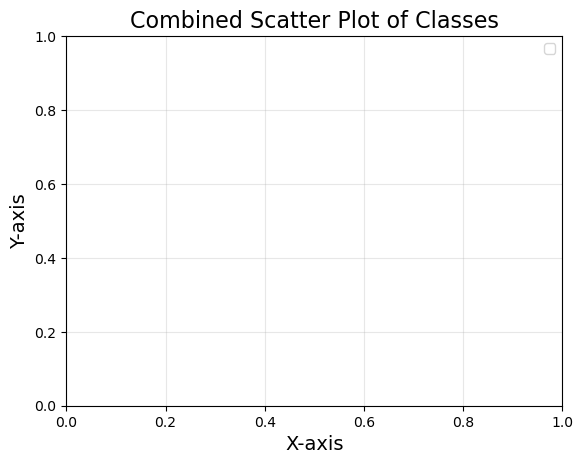

Covariance Matrix:
[[34.00294727 -3.32335155]
 [-3.32335155 31.56780296]]

Mean of the data:
[0.5 0.5]
Converged in 18 iterations!


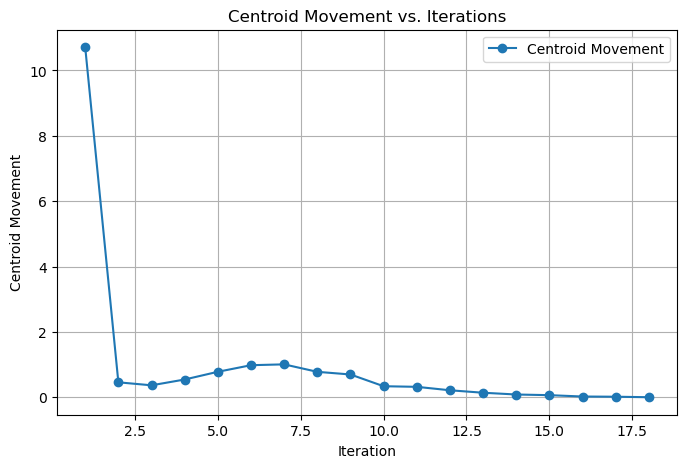

Covariance Matrix:
[[34.00294727 -3.32335155]
 [-3.32335155 31.56780296]]

Mean of the data:
[0.5 0.5]
Converged in 13 iterations!


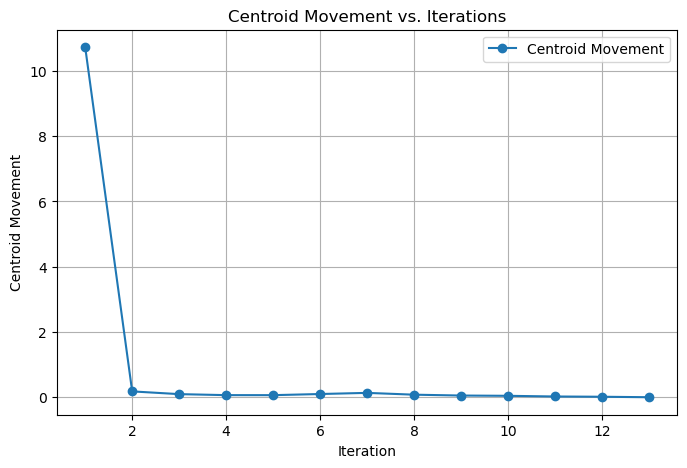

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the Mahalanobis distance
def mahalanobis_dist(x1, x2, cov_matrix):
    mean_diff = x1 - x2  
    cov_matrix_inv = np.linalg.inv(cov_matrix)  
    distance = np.sqrt(np.dot(np.dot(mean_diff.T, cov_matrix_inv), mean_diff))
    return distance

# Define the KMeans clustering function
def KMeansClustering(X, K, maxIteration, mod: bool, tolerance=1e-4):
    m = X.shape[0]
    np.random.seed(42)
    centroids = X[np.random.choice(m, K, replace=False)]
    idx = np.zeros(m, dtype=int)
    prevCentroid = np.zeros_like(centroids)
    cov = np.cov(X, rowvar=False)
    print("Covariance Matrix:")
    print(cov)
    print("\nMean of the data:")
    print(np.mean(X, axis=0))
    iteration_list = []
    centroid_movements = []

    for i in range(maxIteration):
        if mod:
            dist = np.zeros((m, K))
            for j in range(m):
                for k in range(K):
                    dist[j, k] = mahalanobis_dist(X[j], centroids[k], cov)
        else: 
            dist = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        idx = np.argmin(dist, axis=1)
        prevCentroid = centroids.copy()
        for k in range(K):
            points = X[idx == k]
            if len(points) > 0:
                centroids[k] = np.mean(points, axis=0)
        centroid_movement = np.linalg.norm(centroids - prevCentroid)
        iteration_list.append(i + 1)
        centroid_movements.append(centroid_movement)
        if centroid_movement < tolerance:
            print(f"Converged in {i + 1} iterations!")
            break

    # Plot the centroid movement
    plt.figure(figsize=(8, 5))
    plt.plot(iteration_list, centroid_movements, marker='o', label="Centroid Movement")
    plt.title("Centroid Movement vs. Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Centroid Movement")
    plt.grid(True)
    plt.legend()
    plt.show()
        
    return centroids, idx

# Load the data into a DataFrame assuming space-separated format
data = pd.read_csv('desktop/internship/dataset/NLS_Group05.txt', delimiter=r'\s+', header=None)


# Dynamically create column names based on the number of columns
num_columns = data.shape[1]  # Get the actual number of columns
column_names = ['X', 'Y'] + [f'Feature_{i}' for i in range(3, num_columns + 1)]  # Generating column names dynamically
data.columns = column_names

class_labels = np.concatenate([np.zeros(1303), np.ones(1303)])
data['Class'] = class_labels


plt.title("Combined Scatter Plot of Classes", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Features and labels
X = data[['X', 'Y']]  # Features (X and Y)
y = data['Class']  # Labels (Class 1, 2, 3)

# Split the data into 70% training and 30% testing
def train_test_split(data, test_size=0.3):
    np.random.shuffle(data)
    split_idx = int((1 - test_size) * len(data))
    return data[:split_idx], data[split_idx:]

X_train, X_test = train_test_split(X.values, test_size=0.3)

# Perform clustering with Euclidean distance
centroidEuclid, idxEuclid = KMeansClustering(X.values, 2, 100, mod=False)

# Perform clustering with Mahalanobis distance
centroidMahalanobis, idxMahalanobis = KMeansClustering(X.values, 2, 100, mod=True)

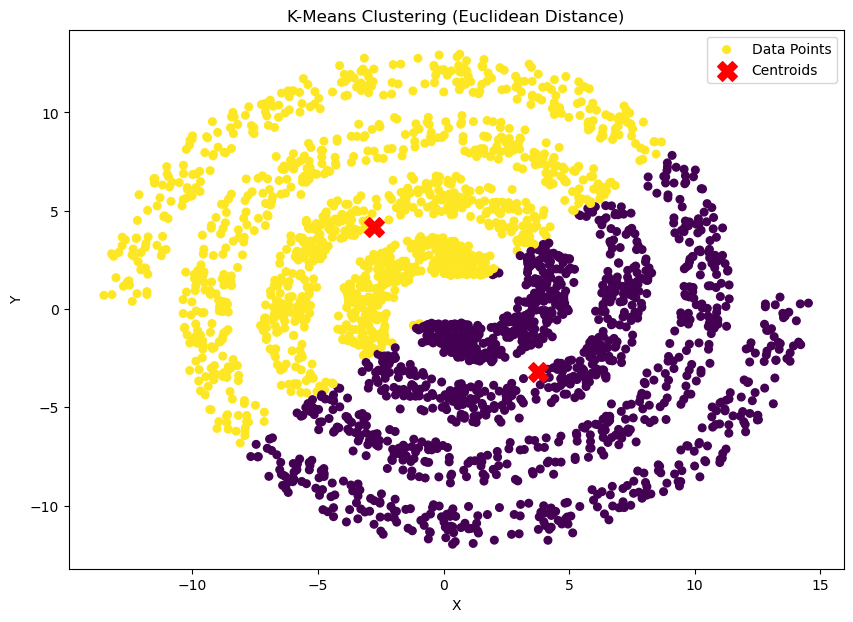

In [2]:
# Plot Euclidean results
plt.figure(figsize=(10, 7))
plt.scatter(X.values[:, 0], X.values[:, 1], c=idxEuclid, cmap='viridis', s=30, label='Data Points')
plt.scatter(centroidEuclid[:, 0], centroidEuclid[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering (Euclidean Distance)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

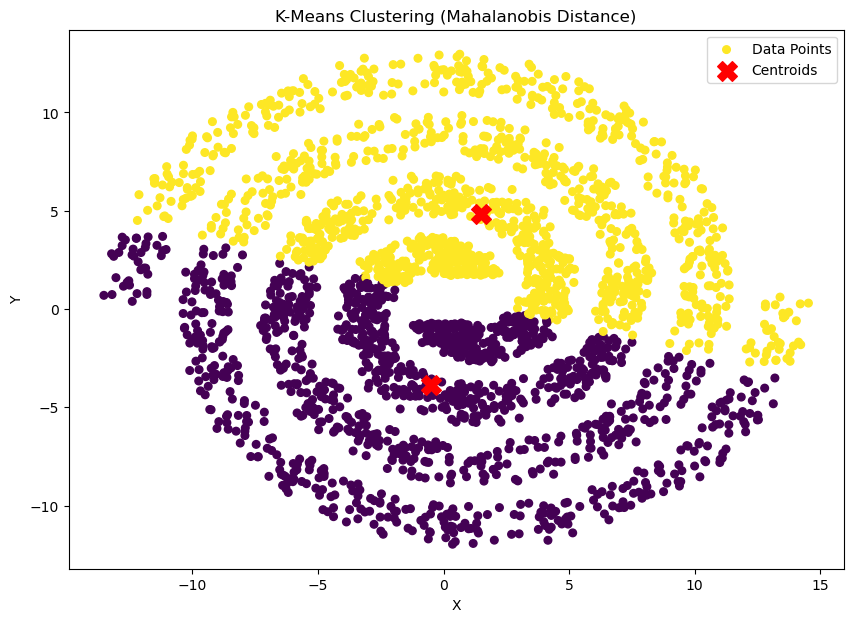

In [3]:
# Plot Mahalanobis results
plt.figure(figsize=(10, 7))
plt.scatter(X.values[:, 0], X.values[:, 1], c=idxMahalanobis, cmap='viridis', s=30, label='Data Points')
plt.scatter(centroidMahalanobis[:, 0], centroidMahalanobis[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering (Mahalanobis Distance)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()